In [2]:
%matplotlib qt 

: 

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from mne.io import read_raw_fif
from mne.preprocessing import ICA

## Grand averaging

In [8]:
#average across participants.

#create a list of name including all subj evoked file names.
ave_names = []
for i in range (1,26):  
    if i not in [18, 20]:   #if i != 18:   #uncomment this line when we need to skip participants.
        data_path = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/"
        ave_name = data_path + "%.3d_ambiguity-ave.fif" %(i)
        ave_names.append(ave_name)
ave_names



['/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/001_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/002_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/003_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/004_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/005_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/006_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/007_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/008_ambiguity-ave.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/009_ambiguity-ave.fif',
 '/Users/p

In [9]:
#actually reading the files.
#sid = [1, 2, 3, 4, 5, 6]

evokeds_dominant = [mne.read_evokeds(ave_name, condition='ambiguous (dominant biasing)') for ave_name in ave_names]#ave_names[0,5]
evokeds_subordinate = [mne.read_evokeds(ave_name, condition='ambiguous (subordinate biasing)') for ave_name in ave_names]
evokeds_unambiguous = [mne.read_evokeds(ave_name, condition='unambiguous') for ave_name in ave_names]

Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/001_ambiguity-ave.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms (ambiguous (dominant biasing))
        0 CTF compensation matrices available
        nave = 32 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/002_ambiguity-ave.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms (ambiguous (dominant biasing))
        0 CTF compensation matrices available
        nave = 32 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/003_ambiguity-ave.fif ...
    Found the data of interest:
        t 

In [10]:
#check.
print(evokeds_dominant)
print(evokeds_subordinate)
print(evokeds_unambiguous)

[<Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>, <Evoked | 'ambiguous (dominant biasing)' (average, N=32), [-0.1, 1] sec, 157 ch, ~1.9 MB>

In [11]:
#ave across participants.
avg_ambiguous1 = mne.grand_average(evokeds_dominant)
avg_ambiguous2 = mne.grand_average(evokeds_subordinate)
avg_unambiguous = mne.grand_average(evokeds_unambiguous)

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [15]:
#load epoch to create evoked for ave across all conditions.
ave_names = []
for i in range (1,26):  
    if i not in [18, 20]: #if i != 9:
        if i <= 20:
            data_path = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/%.3d/" %(i)
            ave_name = data_path + "%.3d_ica_epo.fif" %(i)
            ave_names.append(ave_name)
        else:
            data_path = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/02_meg/"
            ave_name = data_path + "%.3d-epo.fif" %(i)
            ave_names.append(ave_name)
 
ave_names

['/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/001/001_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/002/002_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/003/003_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/004/004_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/005/005_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/006/006_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/007/007_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/008/008_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/009/009_ica_epo.fif',
 '/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguit

In [16]:
evokeds_all = []
for ave_n in ave_names:
    epoch_all = mne.read_epochs(ave_n)
    evoked_all = epoch_all.average()
    evokeds_all.append(evoked_all)

avg_all = mne.grand_average(evokeds_all)

Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/001/001_ica_epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
127 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/002/002_ica_epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/MEG_with_Marco/003/003_ica_epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not s

In [17]:
avg_ambiguous1.comment = 'ambiguous/ dominant biasing (N = 23)'
avg_ambiguous2.comment = 'ambiguous/ subordinate biasing (N = 23)'
avg_unambiguous.comment = 'unambiguous (N = 23)'
avg_all.comment = 'all (N = 23)'

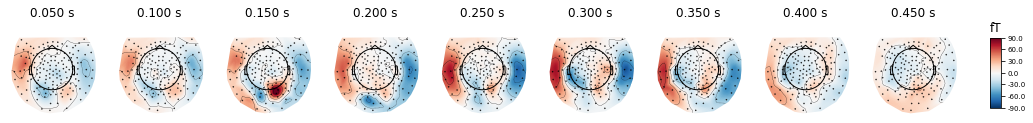

In [18]:
#cond 1 topo.
data_path = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/" 
times = np.arange(0.05, 0.5, 0.05)
avg_ambiguous1.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'amb_dominant_biasing_n23.png')

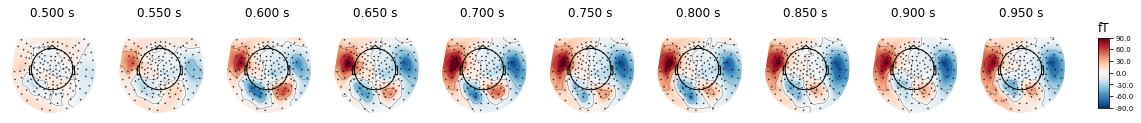

In [19]:
times = np.arange(0.5, 1.0, 0.05)
avg_ambiguous1.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'amb_dominant_biasing2_n23.png')

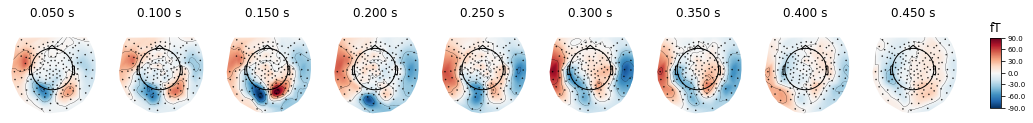

In [20]:
#cond 2.
times = np.arange(0.05, 0.5, 0.05)  
avg_ambiguous2.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'amb_subordinate_biasing_n23.png')

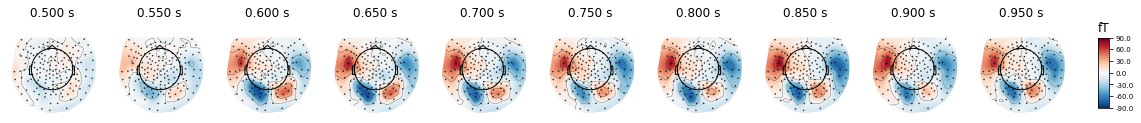

In [21]:
times = np.arange(0.5, 1.0, 0.05)
avg_ambiguous2.plot_topomap(times=times,vmin= -90, vmax=90,ch_type='mag', time_unit='s').savefig(data_path +'amb_subordinate_biasing2_n23.png')

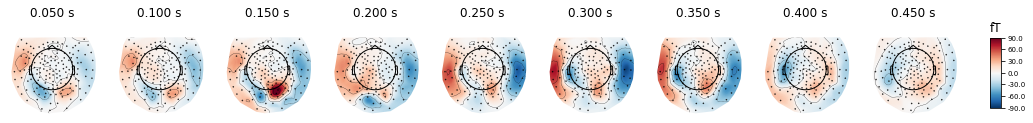

In [22]:
#cond 3.
times = np.arange(0.05, 0.5, 0.05)
avg_unambiguous.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'unambiguous_n23.png')

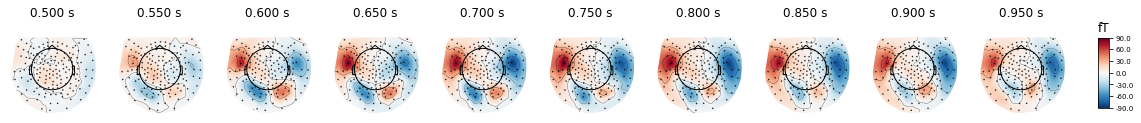

In [23]:
times = np.arange(0.5, 1.0, 0.05)
avg_unambiguous.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'unambiguous2_n23.png')

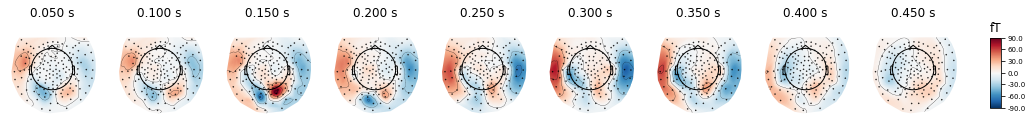

In [24]:
#all conditions avg
times = np.arange(0.05, 0.5, 0.05)
avg_all.plot_topomap(times=times,vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'avg_all_n23.png')

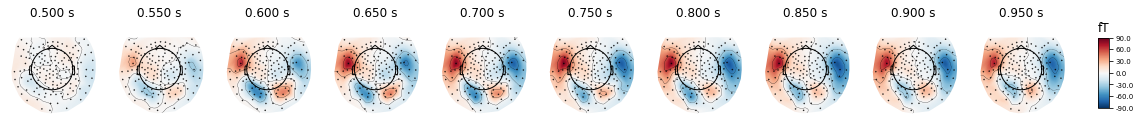

In [25]:
times = np.arange(0.5, 1.0, 0.05)
avg_all.plot_topomap(times=times, vmin= -90, vmax=90, ch_type='mag', time_unit='s').savefig(data_path +'avg_all2_n23.png')

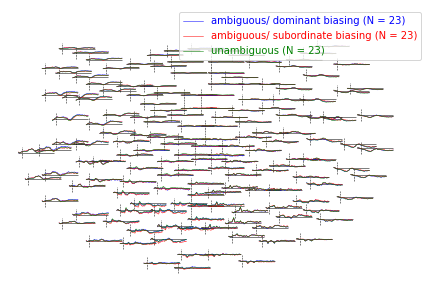

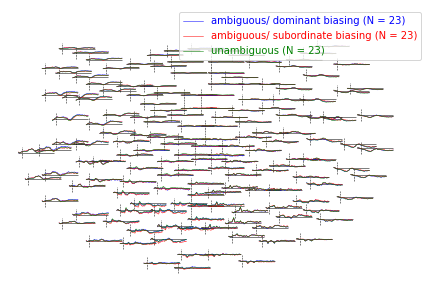

In [27]:
colors = 'blue', 'red', 'green'
mne.viz.plot_evoked_topo([avg_ambiguous1, avg_ambiguous2, avg_unambiguous], color = colors)

In [ ]:
#plot all conditions avg together
#colors = 'blue', 'red', 'black', 'green'
#mne.viz.plot_evoked_topo([avg_ambiguous1, avg_ambiguous2, avg_unambiguous, avg_all], color = colors)

In [28]:
data_path = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/"  
mne.write_evokeds(data_path + 'lee_grand_ave_23.fif', [avg_ambiguous1, avg_ambiguous2, avg_unambiguous, avg_all]) 


<ipython-input-28-f3c7d5327c52>:2: RuntimeWarning: This filename (/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  mne.write_evokeds(data_path + 'lee_grand_ave_23.fif', [avg_ambiguous1, avg_ambiguous2, avg_unambiguous, avg_all])


In [84]:
#read sensor-level grand averaged file
avg_name = "/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif"

evokeds_dominant = mne.read_evokeds(avg_name, condition="ambiguous/ dominant biasing (N = 23)")
evokeds_subordinate = mne.read_evokeds(avg_name, condition="ambiguous/ subordinate biasing (N = 23)")
evokeds_unambiguous = mne.read_evokeds(avg_name, condition="unambiguous (N = 23)")

Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms (ambiguous/ dominant biasing (N = 23))
        0 CTF compensation matrices available
        nave = 23 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms (ambiguous/ subordinate biasing (N = 23))
        0 CTF compensation matrices available
        nave = 23 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_2

<ipython-input-84-228e61dc2175>:4: RuntimeWarning: This filename (/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evokeds_dominant = mne.read_evokeds(avg_name, condition="ambiguous/ dominant biasing (N = 23)")
<ipython-input-84-228e61dc2175>:5: RuntimeWarning: This filename (/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evokeds_subordinate = mne.read_evokeds(avg_name, condition="ambiguous/ subordinate biasing (N = 23)")
<ipython-input-84-228e61dc2175>:6: RuntimeWarning: This filename (/Users/pohengchen/SynologyDrive/NTU_Projects/Ambiguity_2words_MEG/NTULingAmb/05_grandavg_sensor/lee_grand_ave_23.fif

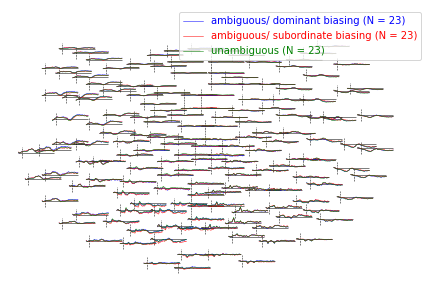

In [40]:
#plot sensor-level results
cond = [evokeds_dominant, evokeds_subordinate, evokeds_unambiguous]
colors = 'blue', 'red', 'green'
mne.viz.plot_evoked_topo(cond, color = colors).savefig(data_path + 'Sensor_cond_diff', dpi = 1000)

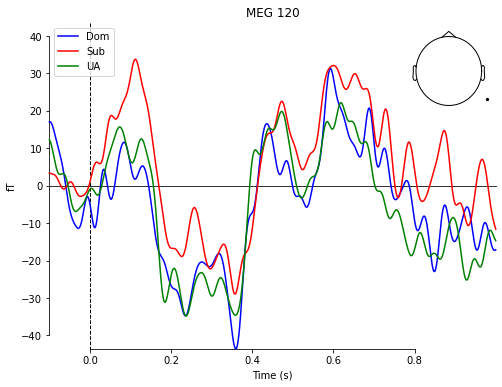

[<Figure size 576x432 with 2 Axes>]

In [100]:

mne.viz.plot_compare_evokeds(
    dict(Dom=evokeds_dominant, Sub=evokeds_subordinate, UA=evokeds_unambiguous),
    colors=dict(Dom='blue', Sub='red', UA='green'),
    picks="MEG 120",
    legend="upper left",
    show_sensors="upper right"
)
#fig = plt.gcf()
#fig.savefig(data_path + 'Sensor_cond_diff_all_sensor_avg', dpi = 1000)

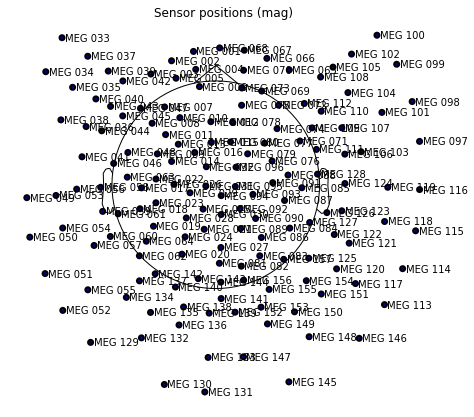

In [77]:
evokeds_dominant.plot_sensors(show_names=True).savefig(data_path + 'Sensor_layout', dpi = 2000, facecolor='white')